## **DATA CLEANING & PREPROCESSING**

The goal of this phase was to transform the raw airbnb listings dataset into a clean, consistent format suitable for Exploratory Data Analysis (EDA). The process focused on fixing datatypes, handling missing values, standardizing formats, managing outliers, and engineering initial features.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Amir Bismi\Desktop\EDA_PROJECT\Data\raw\airbnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### **1) Fixing Datatypes**

In [3]:
#Converted last_review to datetime for time analysis.

df['last_review'] = pd.to_datetime(df['last_review'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

### **2) Standardizing Categorical Columns**

In [4]:
# Capitalize all string columns and trim white spaces.

for cols in df.select_dtypes(include=["object"]).columns:
    df[cols] = df[cols].str.capitalize().str.strip()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit midtown castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,The village of harlem....new york !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy entire floor of brownstone,4869,Lisaroxanne,Brooklyn,Clinton hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire apt: spacious studio/loft by central park,7192,Laura,Manhattan,East harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### **3) Handling Missing Values**

In [5]:
#identifying nulls

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#replacing NaN in name and host_name columns with unknown

df['name'] = df['name'].fillna("unknown")
df['host_name'] = df['host_name'].fillna("unknown")

In [7]:
#filling NaN in last_review with most frequent date

df['last_review'] = df['last_review'].fillna(df['last_review'].mode()[0])

In [8]:
#filling NaN in reviews_per_month with 0

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [9]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### **4) Outlier Detection & Handling**

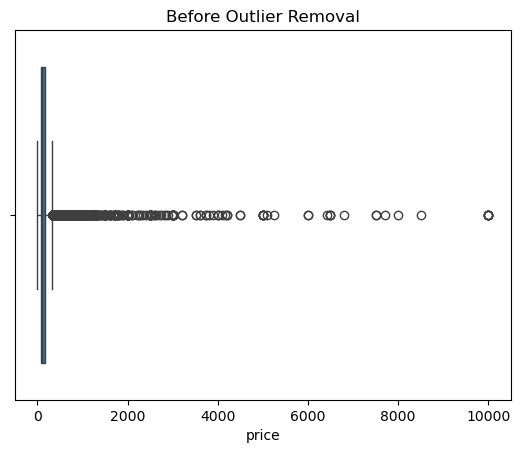

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['price'])
plt.title("Before Outlier Removal")
plt.show()

In [11]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(lower,upper)

-90.0 334.0


In [12]:
#Outliers in the price column were detected using the IQR method. Values outside 1.5×IQR range were removed to prevent skewed analysis.
df = df[(df['price'] >= lower) & (df['price'] <= upper)]

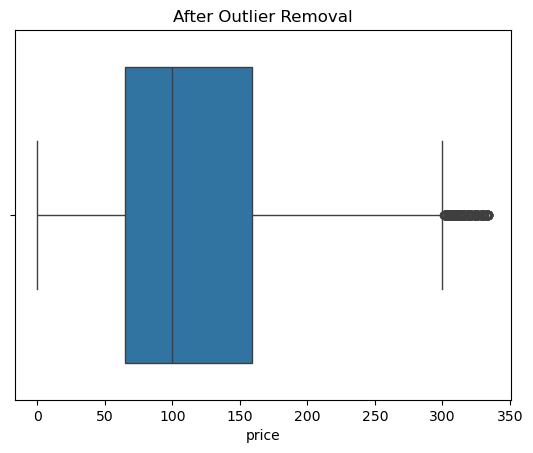

In [13]:
sns.boxplot(x=df['price'])
plt.title("After Outlier Removal")
plt.show()

**Why outlier treatment applied only to price**

- Price is the main variable for analysis (pricing patterns & comparisons)
- Extreme price values heavily skew mean, charts, and correlations
- Removing price outliers improves accuracy of insights
- Other columns (minimum_nights, number_of_reviews) may have valid extreme values
- Removing those could delete meaningful data


### **5) Transformations**

In [14]:
#Log transformation applied to reduce skewness

df['log_price'] = np.log1p(df['price'])

In [16]:
#Dropping unwanted columns

df = df.drop(['id','host_id','latitude','longitude'],axis = 1)
df.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,log_price
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365,5.010635
1,Skylit midtown castle,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5.420535
2,The village of harlem....new york !,Elisabeth,Manhattan,Harlem,Private room,150,3,0,2019-06-23,0.00,1,365,5.017280
3,Cozy entire floor of brownstone,Lisaroxanne,Brooklyn,Clinton hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,4.499810
4,Entire apt: spacious studio/loft by central park,Laura,Manhattan,East harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4.394449


### **6) Saving Cleaned Data as CSV**

In [18]:
df.to_csv(r"C:\Users\Amir Bismi\Desktop\EDA_PROJECT\Data\interim\cleaned_day2.csv",index = False)